## Binary classification - IMDB dataset. Movie good or bad?

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

17260544/17464789 [============================>.] - ETA: 0s

In [36]:
import matplotlib.pyplot as plt

/Users/svenproppert/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


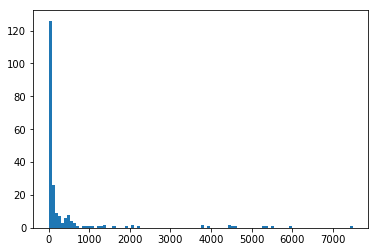

In [40]:
plt.hist(train_data[0], bins = 100)
plt.show()

In [43]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [48]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])


In [49]:
reverse_word_index

{1: u'the',
 2: u'and',
 3: u'a',
 4: u'of',
 5: u'to',
 6: u'is',
 7: u'br',
 8: u'in',
 9: u'it',
 10: u'i',
 11: u'this',
 12: u'that',
 13: u'was',
 14: u'as',
 15: u'for',
 16: u'with',
 17: u'movie',
 18: u'but',
 19: u'film',
 20: u'on',
 21: u'not',
 22: u'you',
 23: u'are',
 24: u'his',
 25: u'have',
 26: u'he',
 27: u'be',
 28: u'one',
 29: u'all',
 30: u'at',
 31: u'by',
 32: u'an',
 33: u'they',
 34: u'who',
 35: u'so',
 36: u'from',
 37: u'like',
 38: u'her',
 39: u'or',
 40: u'just',
 41: u'about',
 42: u"it's",
 43: u'out',
 44: u'has',
 45: u'if',
 46: u'some',
 47: u'there',
 48: u'what',
 49: u'good',
 50: u'more',
 51: u'when',
 52: u'very',
 53: u'up',
 54: u'no',
 55: u'time',
 56: u'she',
 57: u'even',
 58: u'my',
 59: u'would',
 60: u'which',
 61: u'only',
 62: u'story',
 63: u'really',
 64: u'see',
 65: u'their',
 66: u'had',
 67: u'can',
 68: u'were',
 69: u'me',
 70: u'well',
 71: u'than',
 72: u'we',
 73: u'much',
 74: u'been',
 75: u'bad',
 76: u'get',
 77: 

In [50]:
decoded_review

u"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you t

In [13]:
import numpy as np

In [14]:
def vectorize_sequences(sequences, dimension = 10000):
    # create an all-zero matrix of shape(len(sequences), dimension)
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1. #set specific indices of results[i] to 1s
    return results

# our vectorized training_data
x_train = vectorize_sequences(train_data)
# our vectorized test_data
x_test = vectorize_sequences(test_data)

In [55]:
nullen = np.zeros((2,3))
nullen[1,2] = 1
print nullen

[[ 0.  0.  0.]
 [ 0.  0.  1.]]


In [61]:
np.where(x_train[0] > 0)

(array([   1,    2,    4,    5,    6,    7,    8,    9,   12,   13,   14,
          15,   16,   17,   18,   19,   21,   22,   25,   26,   28,   30,
          32,   33,   35,   36,   38,   39,   43,   46,   48,   50,   51,
          52,   56,   62,   65,   66,   71,   76,   77,   82,   87,   88,
          92,   98,  100,  103,  104,  106,  107,  112,  113,  117,  124,
         130,  134,  135,  141,  144,  147,  150,  167,  172,  173,  178,
         192,  194,  215,  224,  226,  256,  283,  284,  297,  316,  317,
         336,  381,  385,  386,  400,  407,  447,  458,  469,  476,  480,
         515,  530,  546,  619,  626,  670,  723,  838,  973, 1029, 1111,
        1247, 1334, 1385, 1415, 1622, 1920, 2025, 2071, 2223, 3766, 3785,
        3941, 4468, 4472, 4536, 4613, 5244, 5345, 5535, 5952, 7486]),)

In [63]:
np.histogram(train_data[0],bins=np.arange(0,20,1))


(array([ 0,  1,  6,  0, 15,  9,  3,  2,  3,  1,  0,  0,  6,  3,  3,  4, 11,
         3,  5]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]))

In [64]:
# our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [65]:
from keras import models
from keras import layers

In [66]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [67]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
#from keras import optimizers
#from keras import losses
#from keras import metrics
#model.compile(optimizer = optimizers.RMSprop(lr=0.001),
 #            loss = losses.binary_crossentropy,
  #           metrics = [metrics.binary_accuracy])

In [68]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [69]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s - loss: 0.5157 - acc: 0.7895 - val_loss: 0.4009 - val_acc: 0.8653
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.3146 - acc: 0.9029 - val_loss: 0.3247 - val_acc: 0.8788
Epoch 3/20
15000/15000 [==============================] - 1s - loss: 0.2319 - acc: 0.9247 - val_loss: 0.2808 - val_acc: 0.8924
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.1816 - acc: 0.9430 - val_loss: 0.2729 - val_acc: 0.8907
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1495 - acc: 0.9515 - val_loss: 0.2780 - val_acc: 0.8888
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1209 - acc: 0.9632 - val_loss: 0.3216 - val_acc: 0.8807
Epoch 7/20
15000/15000 [==============================] - 1s - loss: 0.1030 - acc: 0.9693 - val_loss: 0.3045 - val_acc: 0.8856
Epoch 8/20
15000/15000 [==============================] - 1s 

In [70]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [71]:
# keys:
#['acc', 'loss', 'val_acc', 'val_loss']
# keys mit der oben auskommentierten mehr-flexibilitaet-version:
#['loss', 'val_binary_accuracy', 'val_loss', 'binary_accuracy']

In [72]:
import matplotlib.pyplot as plt

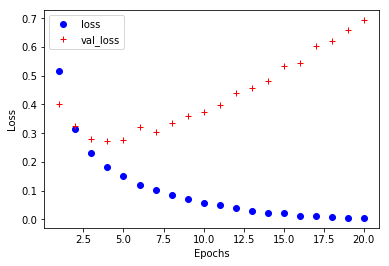

In [73]:
plt.clf()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo', label = 'loss')
# "r+" is for "red crosses"
plt.plot(epochs, val_loss_values, 'r+', label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

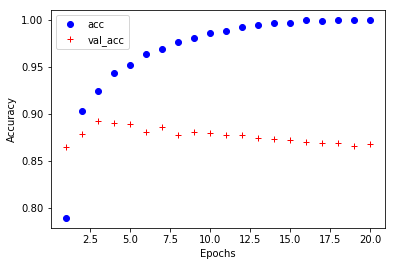

In [74]:
plt.clf() # clears figure

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo',label = 'acc')
plt.plot(epochs, val_acc_values, 'r+', label ='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
# the final thing:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                   epochs = 4,
                   batch_size = 512)

results = model.evaluate(x_test, y_test)

print '\n',results

Epoch 1/4
25000/25000 [==============================] - 2s - loss: 0.4719 - acc: 0.8105     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2652 - acc: 0.9079     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.2022 - acc: 0.9278     
Epoch 4/4
24640/25000 [============================>.] - ETA: 0s
[0.29110489470481871, 0.88483999999999996]


In [80]:
model.predict(x_test)

array([[ 0.92243034],
       [ 0.83403015],
       [ 0.99947768],
       ..., 
       [ 0.44272763],
       [ 0.00368884],
       [ 0.81248981]], dtype=float32)

In [81]:
history_dict = history.history
history_dict.keys()

['acc', 'loss']

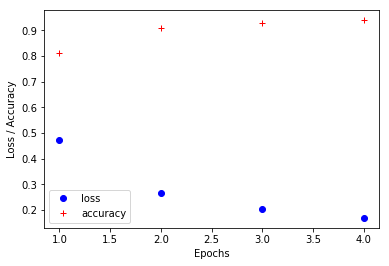

In [82]:
plt.clf()

loss_values = history_dict['loss']
acc_values = history_dict['acc']
epochs = range(1,len(loss_values)+1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo', label = 'loss')
# "r+" is for "red crosses"
plt.plot(epochs, acc_values, 'r+', label = 'accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

### Exercises:

- try to use 1 or 3 layers and see how it affects validation and test accuracy... 1 i still ok. more layers decrease test_accuracy
- try to use layers with more or less hidden units: 4, 8, 32, 64... takes longer, accuracy goes slightly down
- use mse loss function instead of binary_crossentropy... loss value a lot lower. what does that mean? acc ok
- use tanh (was very popular in the early days) activation instead of relu... does not change too much. acc slightly lower

In [35]:
# other number of layers (comment out as many as you want)
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                   epochs = 4,
                   batch_size = 512)

results = model.evaluate(x_test, y_test)

print '\n',results

Epoch 1/4
25000/25000 [==============================] - 4s - loss: 0.5865 - acc: 0.7238     
Epoch 2/4
25000/25000 [==============================] - 3s - loss: 0.2998 - acc: 0.8909     
Epoch 3/4
25000/25000 [==============================] - 3s - loss: 0.2309 - acc: 0.9152     
Epoch 4/4
24672/25000 [============================>.] - ETA: 0s
[0.40702225735664366, 0.85224]


In [30]:
# more or less hidden units
hidden_units = 64
model = models.Sequential()
model.add(layers.Dense(hidden_units, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(hidden_units, activation = 'relu'))
model.add(layers.Dense(hidden_units, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                   epochs = 4,
                   batch_size = 512)

results = model.evaluate(x_test, y_test)

print '\n',results

Epoch 1/4
25000/25000 [==============================] - 9s - loss: 0.4222 - acc: 0.8198     
Epoch 2/4
25000/25000 [==============================] - 8s - loss: 0.2395 - acc: 0.9089     
Epoch 3/4
25000/25000 [==============================] - 9s - loss: 0.1852 - acc: 0.9304     
Epoch 4/4
24832/25000 [============================>.] - ETA: 0s
[0.38909035671234132, 0.86199999999999999]


In [32]:
# mse loss function
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'mse',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                   epochs = 4,
                   batch_size = 512)

results = model.evaluate(x_test, y_test)

print '\n',results

Epoch 1/4
25000/25000 [==============================] - 7s - loss: 0.1683 - acc: 0.7994     
Epoch 2/4
25000/25000 [==============================] - 7s - loss: 0.0879 - acc: 0.9058     
Epoch 3/4
25000/25000 [==============================] - 7s - loss: 0.0632 - acc: 0.9284     
Epoch 4/4
24832/25000 [============================>.] - ETA: 0s
[0.087987250883579254, 0.88124000000000002]


In [33]:
# tanh activation
model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                   epochs = 4,
                   batch_size = 512)

results = model.evaluate(x_test, y_test)

print '\n',results

Epoch 1/4
25000/25000 [==============================] - 3s - loss: 0.4385 - acc: 0.8304     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2437 - acc: 0.9134     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.1820 - acc: 0.9347     
Epoch 4/4
24992/25000 [============================>.] - ETA: 0s
[0.31737480518341066, 0.87944]
